# Lecture 10 : Independent Component Analysis

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
%load_ext autoreload
%autoreload 2

The following notebook uses the speech-music separation example from https://cnl.salk.edu/~tewon/blind_audio.html.

## Load and inspect the first audio file

In [2]:
from scipy.io import wavfile

In [3]:
rate, signal_1 = wavfile.read('audio/rsm2_mA.wav')
rate, signal_1.shape

(16000, (110000,))

This signal has 110,000 samples with a sampling rate of 16,000 samples/second, which means its length in seconds is:

In [4]:
signal_1.shape[0]/rate

6.875

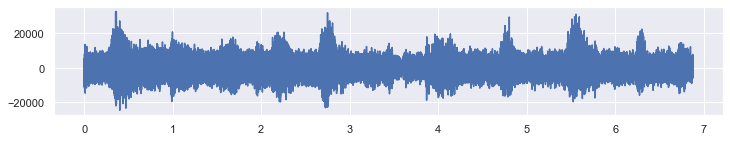

In [5]:
time = np.arange(signal_1.shape[0])/rate
plt.figure(figsize=(12,2))
plt.plot(time, signal_1)

In [6]:
import IPython.display as ipd
ipd.Audio(signal_1, rate=rate)

## Load and inspect the second audio file

In [7]:
rate, signal_2 = wavfile.read('audio/rsm2_mB.wav')
rate, signal_2.shape

(16000, (110000,))

In [8]:
ipd.Audio(signal_2, rate=rate)

## Combine signals into DataFrame

In [9]:
X = pd.DataFrame({'A': signal_1, 'B': signal_2, 'time': time}).set_index('time')
X.shape

(110000, 2)

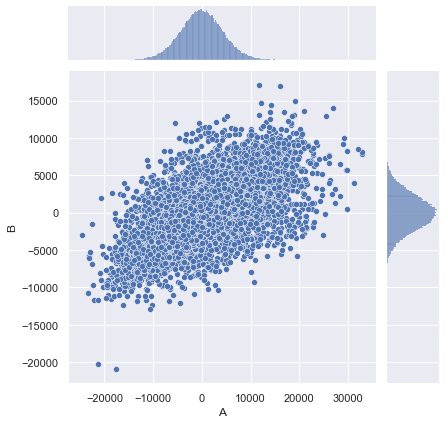

In [19]:
sns.jointplot(x='A', y='B', data=X.astype('float'))

In [20]:
from sklearn.decomposition import FastICA

In [21]:
ica = FastICA(n_components=2, algorithm='deflation') # Initialize transformation object

ica.fit(X)                    # Fit transformation

separated = ica.transform(X)  # Apply transformation

In [22]:
separated.shape

(110000, 2)

## Inspect first separated source

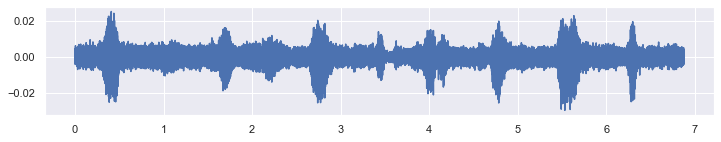

In [23]:
plt.figure(figsize=(12,2))
plt.plot(time, separated[:,0])

In [24]:
ipd.Audio(separated[:,0], rate=rate)

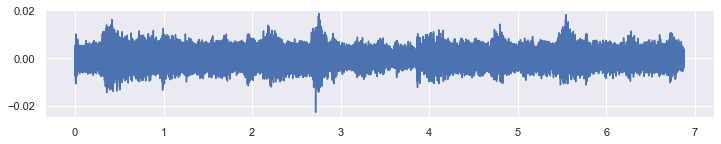

In [25]:
plt.figure(figsize=(12,2))
plt.plot(time, separated[:,1])

In [17]:
ipd.Audio(separated[:,1], rate=rate)